# Earnings Strategy 1 - 변동성에 betting

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
def call_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    price = sT - strike_price
    pnl = np.where(sT > strike_price, price, 0) - premium
    return pnl * contracts * multiplier

def put_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT < strike_price, strike_price - sT, 0) - premium
    return pnl * contracts * multiplier

# Buy the Strangle

동일행사가, 동일만기의 put, call option 모두를 premium 지불하고 long position 취함.

주가가 strike price 보다 많이 변동하면 이익. 변하지 않으면 손실

 The quarterly earnings announcement date for Infosys is 24 October 2017. 

A week before earnings announcement that is, on 17 October 2017, we set up the long strangle by buying the 960 strike call and the 900 strike put.

17 October 2017 Infy October Futures Price is ₹934.60

1. Buy 900 Strike Put @ ₹4.65
2. Buy 960 Strike Call @ ₹7.50

Total premium paid is ₹12.15

Implied Volatility (IV)

1. IV of 900 Strike Put is 28.7%
2. IV of 960 Strike Call is 29.2%

In [36]:
future_price = 934.60

# 콜옵션 매수
strike_price_long_call = 960
premium_long_call = 7.50

#  풋옵션 매수
strike_price_long_put = 900
premium_long_put = 4.65

total_expense_enter = premium_long_call + premium_long_put

print('Straddle 손익\n')
print('콜옵션 매수 :', strike_price_long_call)
print('풋옵션 매수 :', strike_price_long_put)
print('Total premium paid :', total_expense_enter)

Straddle 손익

콜옵션 매수 : 960
풋옵션 매수 : 900
Total premium paid : 12.15


Text(0,0.5,'P & L')

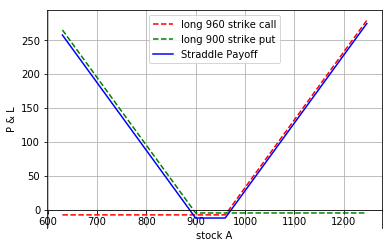

In [37]:
# Stock price range at expiration of the call
sT = np.arange(0.7*strike_price_long_put,1.3*strike_price_long_call,1) 

payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_straddle = payoff_long_call + payoff_long_put

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call, 'r--', 
        label="long "+str(strike_price_long_call)+" strike call")
ax.plot(sT,payoff_long_put, 'g--', 
        label="long "+str(strike_price_long_put)+" strike put")
ax.plot(sT, payoff_straddle , 'b-', label='Straddle Payoff')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')

# Exit the Strangle

The results were scheduled to be announced after market hours on 24 October 2017. Right before that, on 24 October 2017 around market closing time, we exited the long strangle positions.

24 October 2017 Infy October Futures Price is ₹926.00

Square off the existing positions
1. Sell 900 Strike Put @ ₹8.75
2. Sell 960 Strike Call @ ₹7.35

Total premium received is ₹16.10

In [40]:
future_price = 926.00

# 콜옵션 매도
strike_price_short_call = 960
premium_short_call = 7.35

#  풋옵션 매도
strike_price_short_put = 900
premium_short_put = 8.75


payoff_short_call = -call_payoff(future_price, strike_price_short_call, premium_short_call)
payoff_short_put = -put_payoff(future_price, strike_price_short_put, premium_short_put)
payoff_straddle = payoff_short_call + payoff_short_put 
net_pnl = payoff_straddle - total_expense_enter

print('Total premium received :', payoff_straddle)
print('Net premium = {:.2f}'.format(net_pnl))

Total premium received : 16.1
Net premium = 3.95
